In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')  ##  reading the original csv file
df.head()                   ## Checking the few data 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape  ## Original Shape of data

(39717, 111)

In [4]:
## removing columns with NAN and Null Values
df_cleaned = df.dropna(axis=1,how='all') # This drops rows or columns only if all the values in the row or column are NaN.
df_cleaned.to_csv('cleaned_file.csv', index=False)
columns_to_delete = ['acc_now_delinq', 'delinq_amnt','application_type','policy_code','initial_list_status','url','zip_code','sub_grade','id','member_id','pymnt_plan','policy_code','earliest_cr_line','chargeoff_within_12_mths','next_pymnt_d','collections_12_mths_ex_med','emp_title','desc','mths_since_last_delinq','mths_since_last_record','tax_liens']  # deleted the non needed columns

# Drop the specified columns
df_cleaned = df_cleaned.drop(columns=columns_to_delete)

In [5]:
df_cleaned.shape   ## number of columns removed from 111 to 37


(39717, 37)

In [6]:
## Cleaned emp_length from object to int by replacing keywords of years
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace('+ years', '').str.replace('< 1 year', '0').str.replace('year', '')
df_cleaned['emp_length'] = pd.to_numeric(df_cleaned['emp_length'], errors='coerce').astype('Int64') 

## Cleaned int_rate from object to float by replacing keywords of %

df_cleaned['int_rate'] = df_cleaned['int_rate'].str.replace('%', '')
df_cleaned['int_rate'] = pd.to_numeric(df_cleaned['int_rate'], errors='coerce').astype('float64') 


In [7]:
df_cleaned.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
emp_length                   Int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

In [8]:
df_cleaned.info

<bound method DataFrame.info of        loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months     10.65   
1           2500         2500           2500.0   60 months     15.27   
2           2400         2400           2400.0   36 months     15.96   
3          10000        10000          10000.0   36 months     13.49   
4           3000         3000           3000.0   60 months     12.69   
...          ...          ...              ...         ...       ...   
39712       2500         2500           1075.0   36 months      8.07   
39713       8500         8500            875.0   36 months     10.28   
39714       5000         5000           1325.0   36 months      8.07   
39715       5000         5000            650.0   36 months      7.43   
39716       7500         7500            800.0   36 months     13.75   

       installment grade  emp_length home_ownership  annual_inc  ...  \
0           162.87     B       

In [9]:
df_cleaned.isna().sum()  ## And we get this series here in which each record contains the number of missings of that column.

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                 23015
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_

In [10]:
(df_cleaned.isna().sum()/df_cleaned.isna().shape[0]).sort_values().sort_values(ascending=False) ## percentage of how many items has missings 

emp_length                 0.579475
pub_rec_bankruptcies       0.017549
last_pymnt_d               0.001788
revol_util                 0.001259
title                      0.000277
last_credit_pull_d         0.000050
home_ownership             0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
dti                        0.000000
loan_status                0.000000
verification_status        0.000000
issue_d                    0.000000
funded_amnt_inv            0.000000
purpose                    0.000000
annual_inc                 0.000000
term                       0.000000
loan_amnt                  0.000000
last_pymnt_amnt            0.000000
addr_state                 0.000000
collection_recovery_fee    0.000000
recoveries                 0.000000
total_rec_late_fee         0.000000
total_rec_int              0.000000
total_rec_prncp            0.000000
total_pymnt_inv            0.000000
total_pymnt                0

In [11]:
sums=df_cleaned.groupby('title').size().reset_index(name='title provided by borrower')  ## Checking if any explicit title company is not at fault
sums_sorted = sums.sort_values(by='title provided by borrower', ascending=False)
print(sums_sorted)


                                      title  title provided by borrower
4502                     Debt Consolidation                        2184
4603                Debt Consolidation Loan                        1729
12416                         Personal Loan                         659
3412                          Consolidation                         517
16925                    debt consolidation                         505
...                                     ...                         ...
6945       Good credit never missed payment                           1
6944                       Good credit here                           1
6943               Good credit = new wheels                           1
6942   Good credit - consolidating expenses                           1
19614             îîMY FIRST CAR îî                           1

[19615 rows x 2 columns]


In [12]:
df_cleaned.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,16702.0,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,5.510119,6.896893e+04,13.315130,0.146512,0.869200,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,4.795337,6.379377e+04,6.678594,0.491812,1.070219,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.0,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,0.0,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,10.0,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,10.0,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,10.0,6.000000e+06,29.990000,11.000000,8.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [13]:
df_cleaned.describe(include=['object'])  ## In this way we are including the categorical variables and this is the result.

,term,grade,home_ownership,verification_status,issue_d,loan_status,purpose,title,addr_state,revol_util,last_pymnt_d,last_credit_pull_d
count,39717,39717,39717,39717,39717,39717,39717,39706,39717,39667,39646,39715
unique,2,7,5,3,55,3,14,19615,50,1089,101,106
top,36 months,B,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,CA,0%,May-16,May-16
freq,29096,12020,18899,16921,2260,32950,18641,2184,7099,977,1256,10308


In [14]:
df_cleaned.describe(include=['number'])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,16702.0,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,5.510119,6.896893e+04,13.315130,0.146512,0.869200,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,4.795337,6.379377e+04,6.678594,0.491812,1.070219,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.0,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,0.0,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,10.0,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,10.0,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,10.0,6.000000e+06,29.990000,11.000000,8.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [30]:
## let's see the correlation of all the columns with each other
import seaborn as sns                   
import matplotlib.pyplot as plt

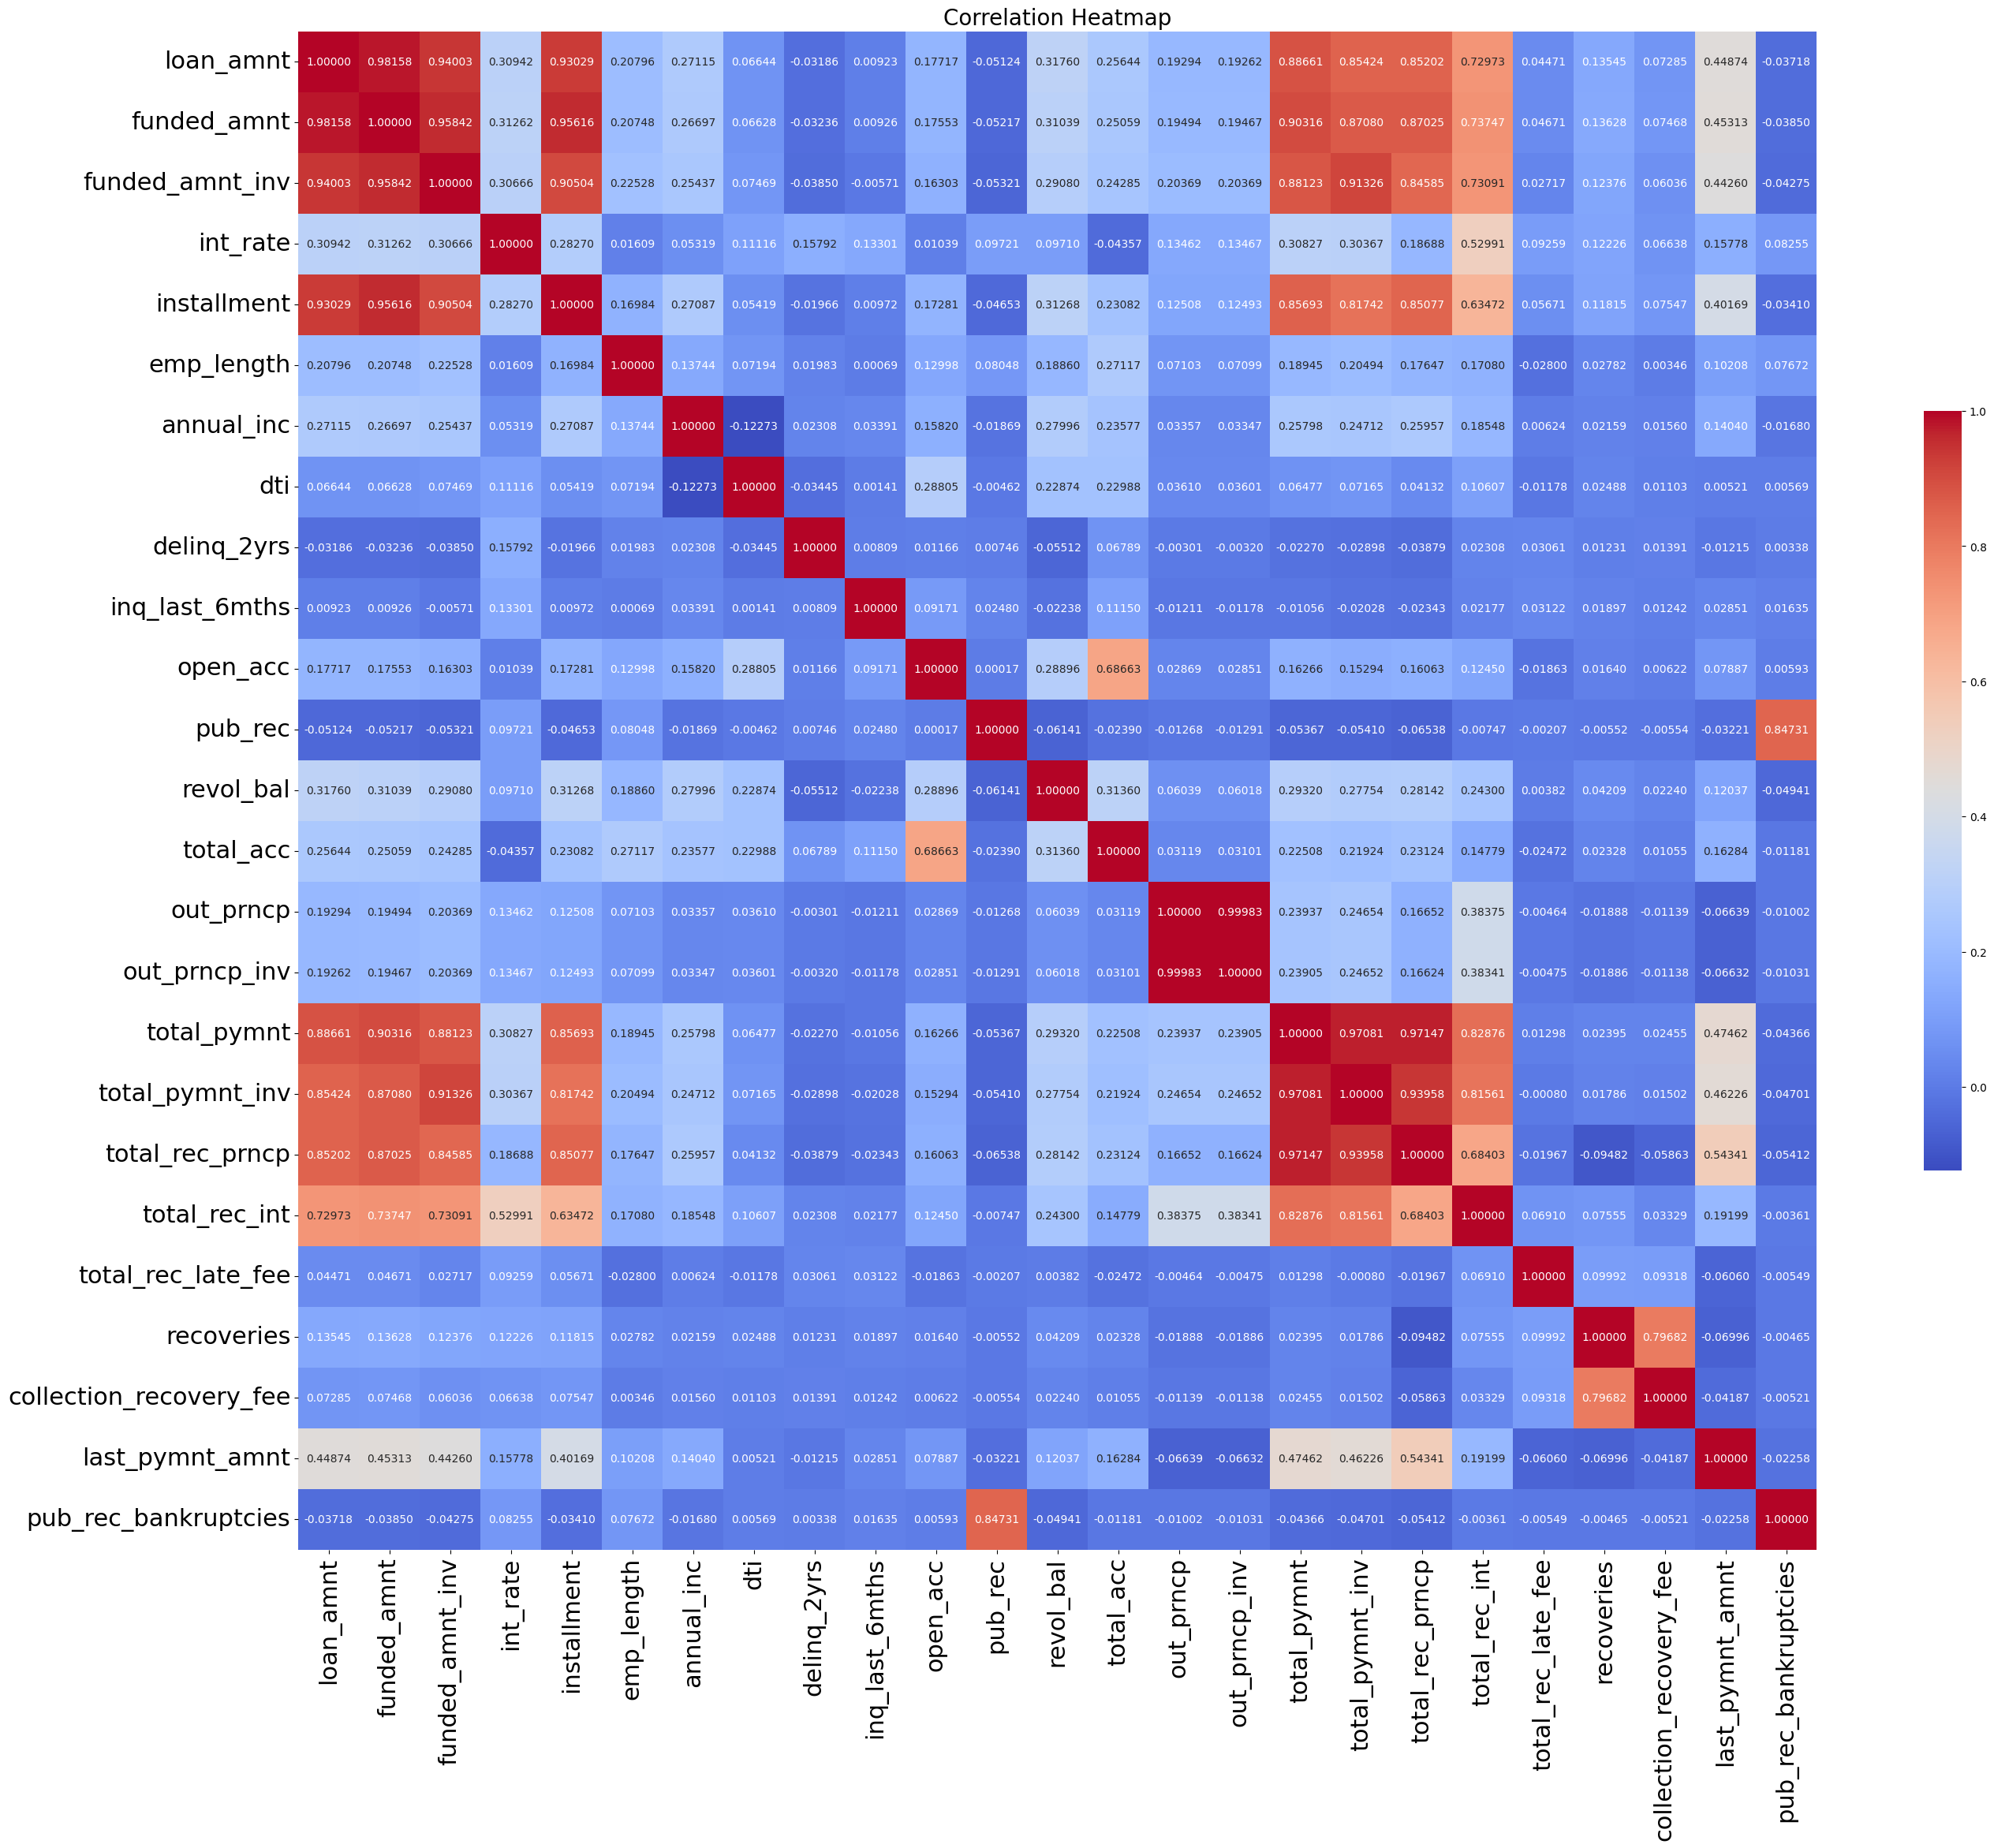

In [31]:
numerical_df = df_cleaned.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(35, 25))
sns.heatmap(corr_matrix, annot=True, fmt=".5f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()


In [32]:
df_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [33]:
df_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


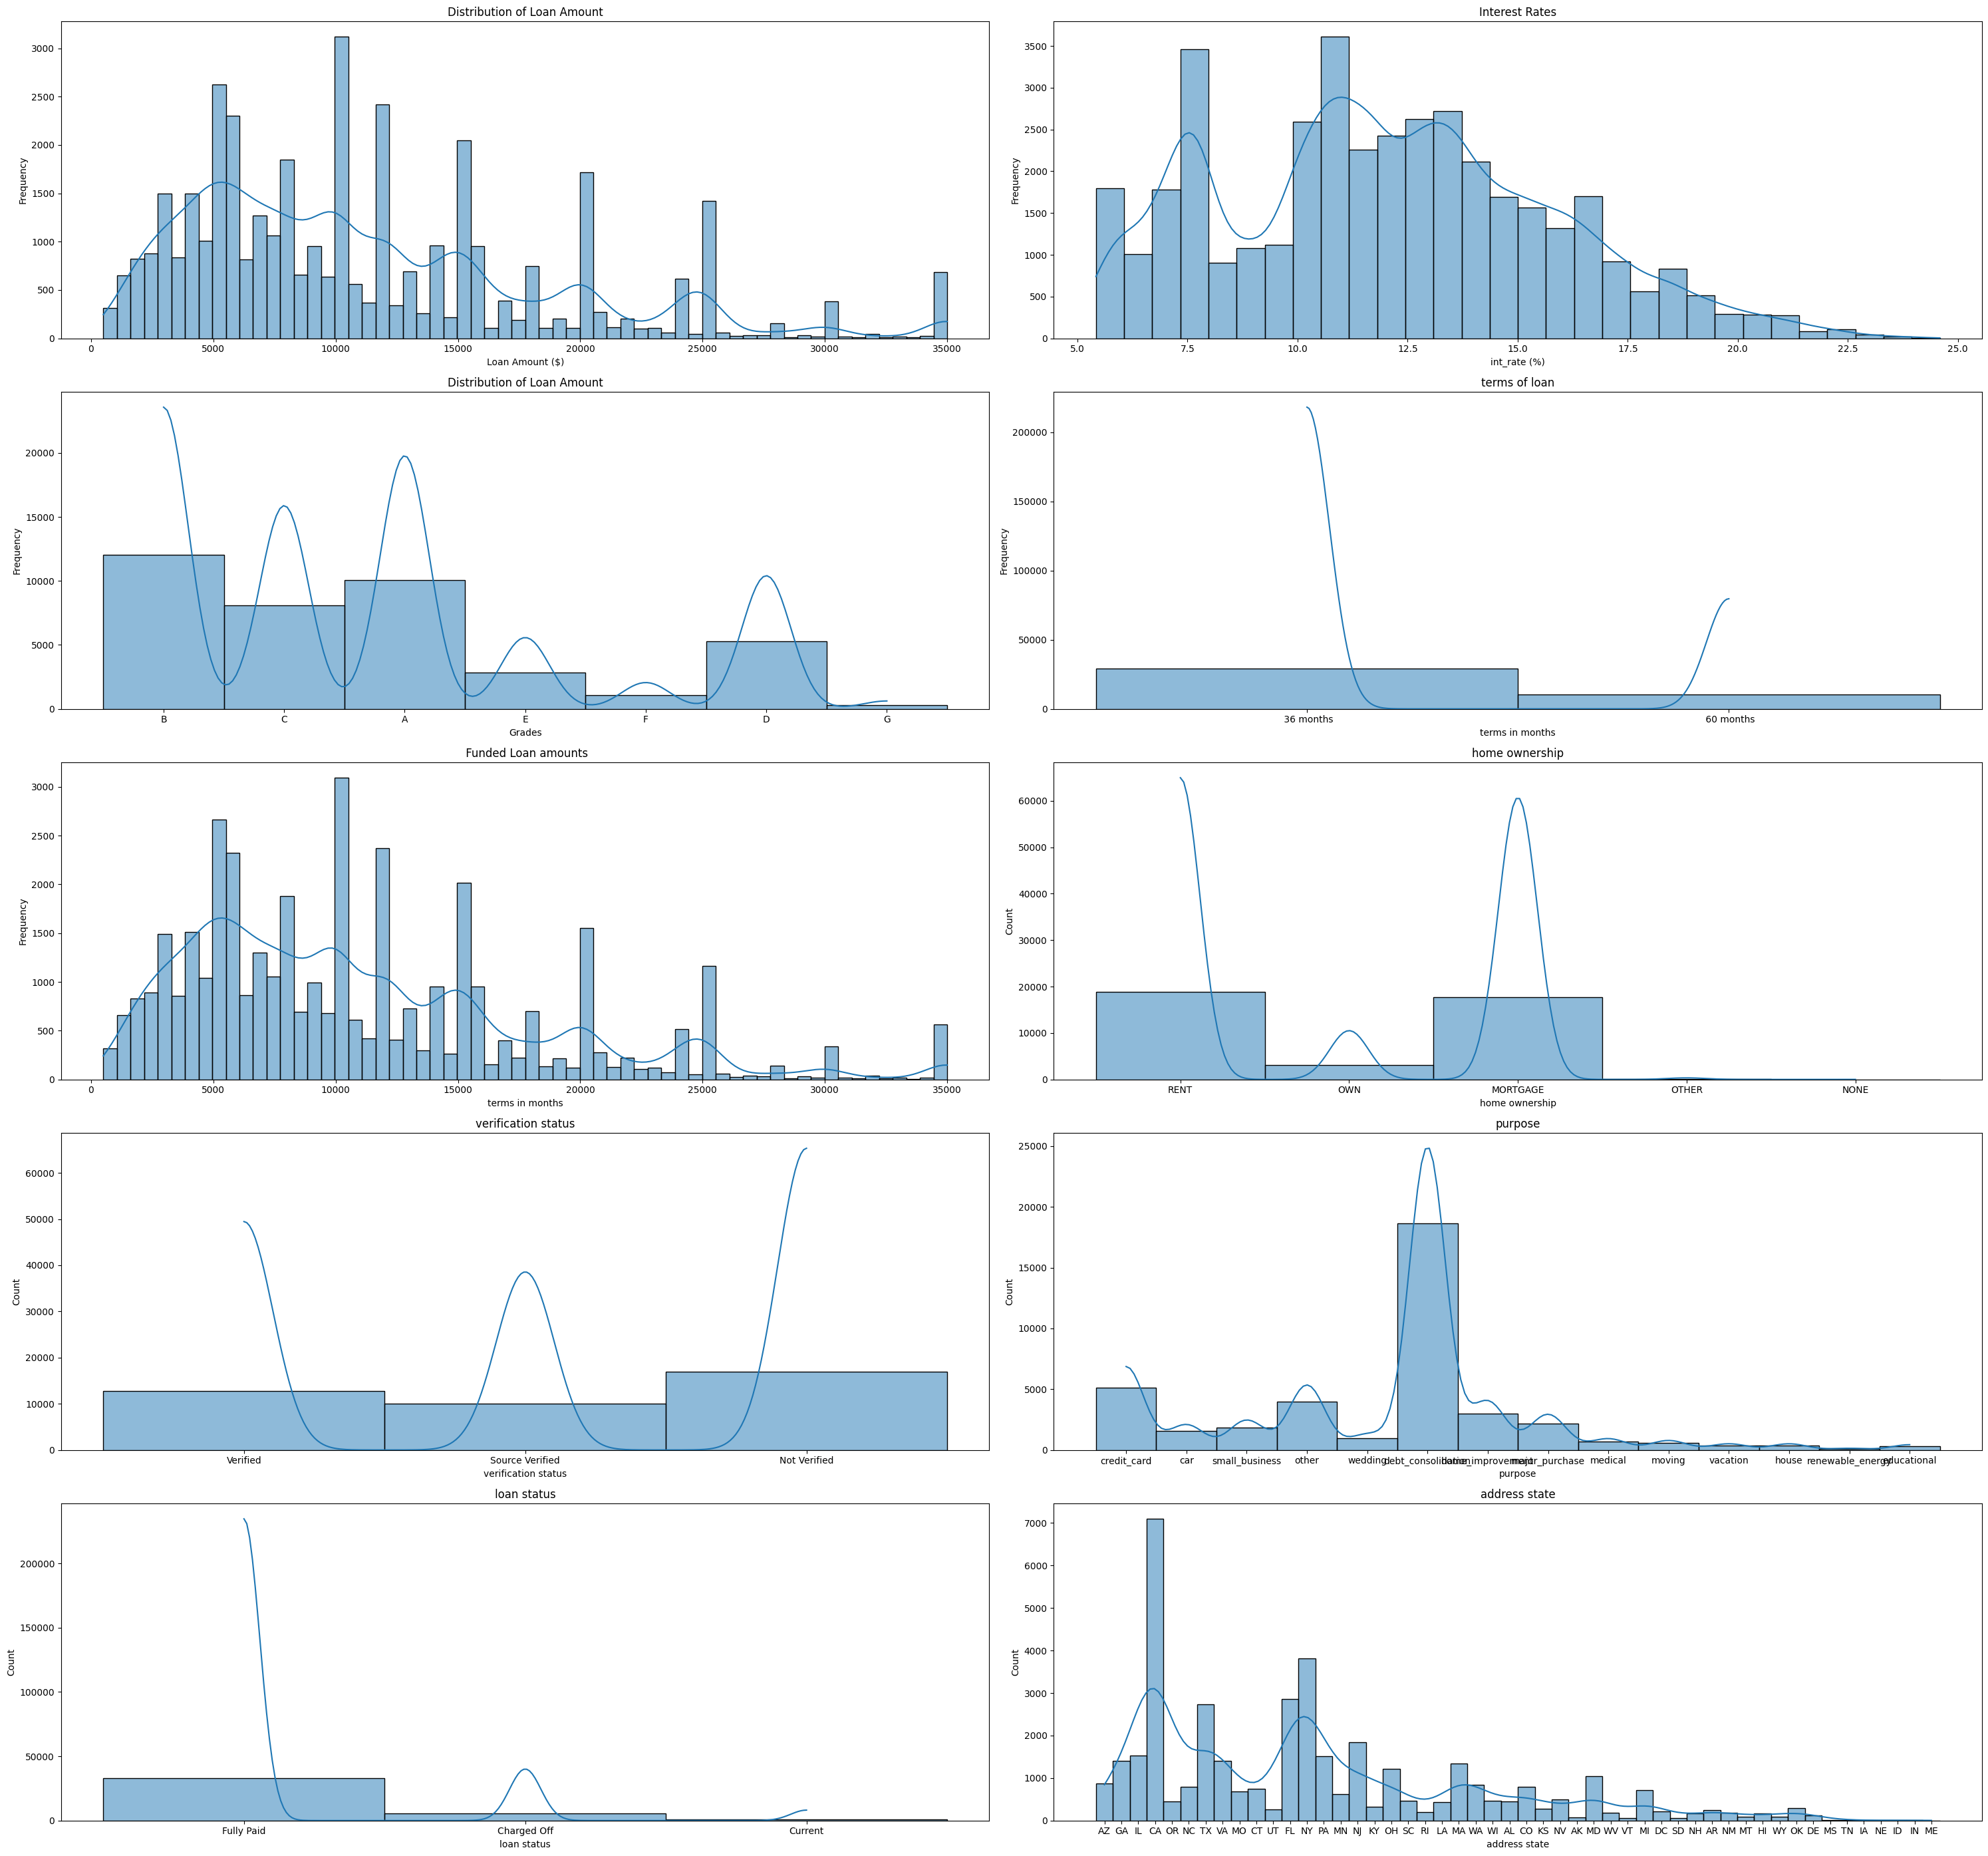

In [34]:

loanamnt = df_cleaned['loan_amnt'].describe()
intrate = df_cleaned['int_rate'].describe()
termstats = df_cleaned['int_rate'].value_counts()
gradestats = df_cleaned['grade'].value_counts()

# Plotting the distributions and bar charts
fig, axs = plt.subplots(5, 2, figsize=(30, 28))
sns.histplot(df_cleaned['loan_amnt'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Loan Amount')
axs[0, 0].set_xlabel('Loan Amount ($)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(df_cleaned['int_rate'], kde=True, ax=axs[0, 1],bins=30)
axs[0, 1].set_title('Interest Rates')
axs[0, 1].set_xlabel('int_rate (%)')
axs[0, 1].set_ylabel('Frequency')

 
sns.histplot(df_cleaned['grade'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Loan Amount')
axs[1, 0].set_xlabel('Grades')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(df_cleaned['term'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('terms of loan')
axs[1, 1].set_xlabel('terms in months')
axs[1, 1].set_ylabel('Frequency')

sns.histplot(df_cleaned['funded_amnt'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title(' Funded Loan amounts')
axs[2, 0].set_xlabel('terms in months')
axs[2, 0].set_ylabel('Frequency')

sns.histplot(df_cleaned['home_ownership'], kde=True, ax=axs[2, 1])
axs[2, 1].set_title('home ownership')
axs[2, 1].set_xlabel('home ownership')


sns.histplot(df_cleaned['verification_status'], kde=True, ax=axs[3, 0])
axs[3, 0].set_title('verification status')
axs[3, 0].set_xlabel('verification status')


sns.histplot(df_cleaned['purpose'], kde=True, ax=axs[3, 1],bins=20)
axs[3, 1].set_title('purpose')
axs[3, 1].set_xlabel('purpose')


sns.histplot(df_cleaned['loan_status'], kde=True, ax=axs[4, 0],bins=20)
axs[4, 0].set_title('loan status')
axs[4, 0].set_xlabel('loan status')

sns.histplot(df_cleaned['addr_state'], kde=True, ax=axs[4, 1],bins=20)
axs[4, 1].tick_params(axis='both', which='major', labelsize=10)  # Increase font size of both x and y ticks
axs[4, 1].set_title('address state')
axs[4, 1].set_xlabel('address state')


plt.tight_layout()
plt.show()
 

<Axes: >

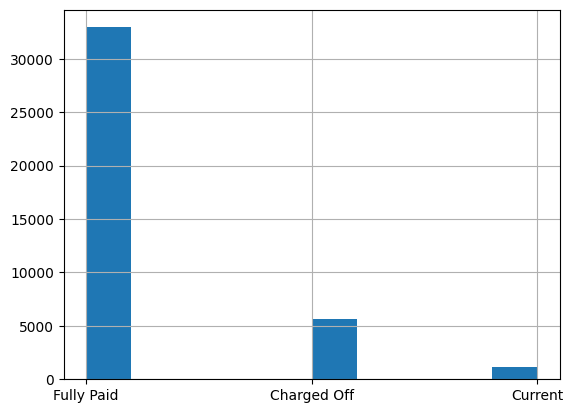

In [35]:
df_cleaned['loan_status'].hist()

loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: count, dtype: float64


<Axes: title={'center': 'Loan Status Distribution'}, ylabel='count'>

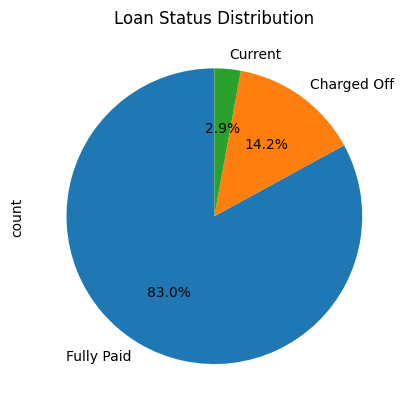

In [36]:
status_count = df_cleaned['loan_status'].value_counts()
status_perc = status_count / status_count.sum() * 100
print(status_perc)
status_perc.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Loan Status Distribution')

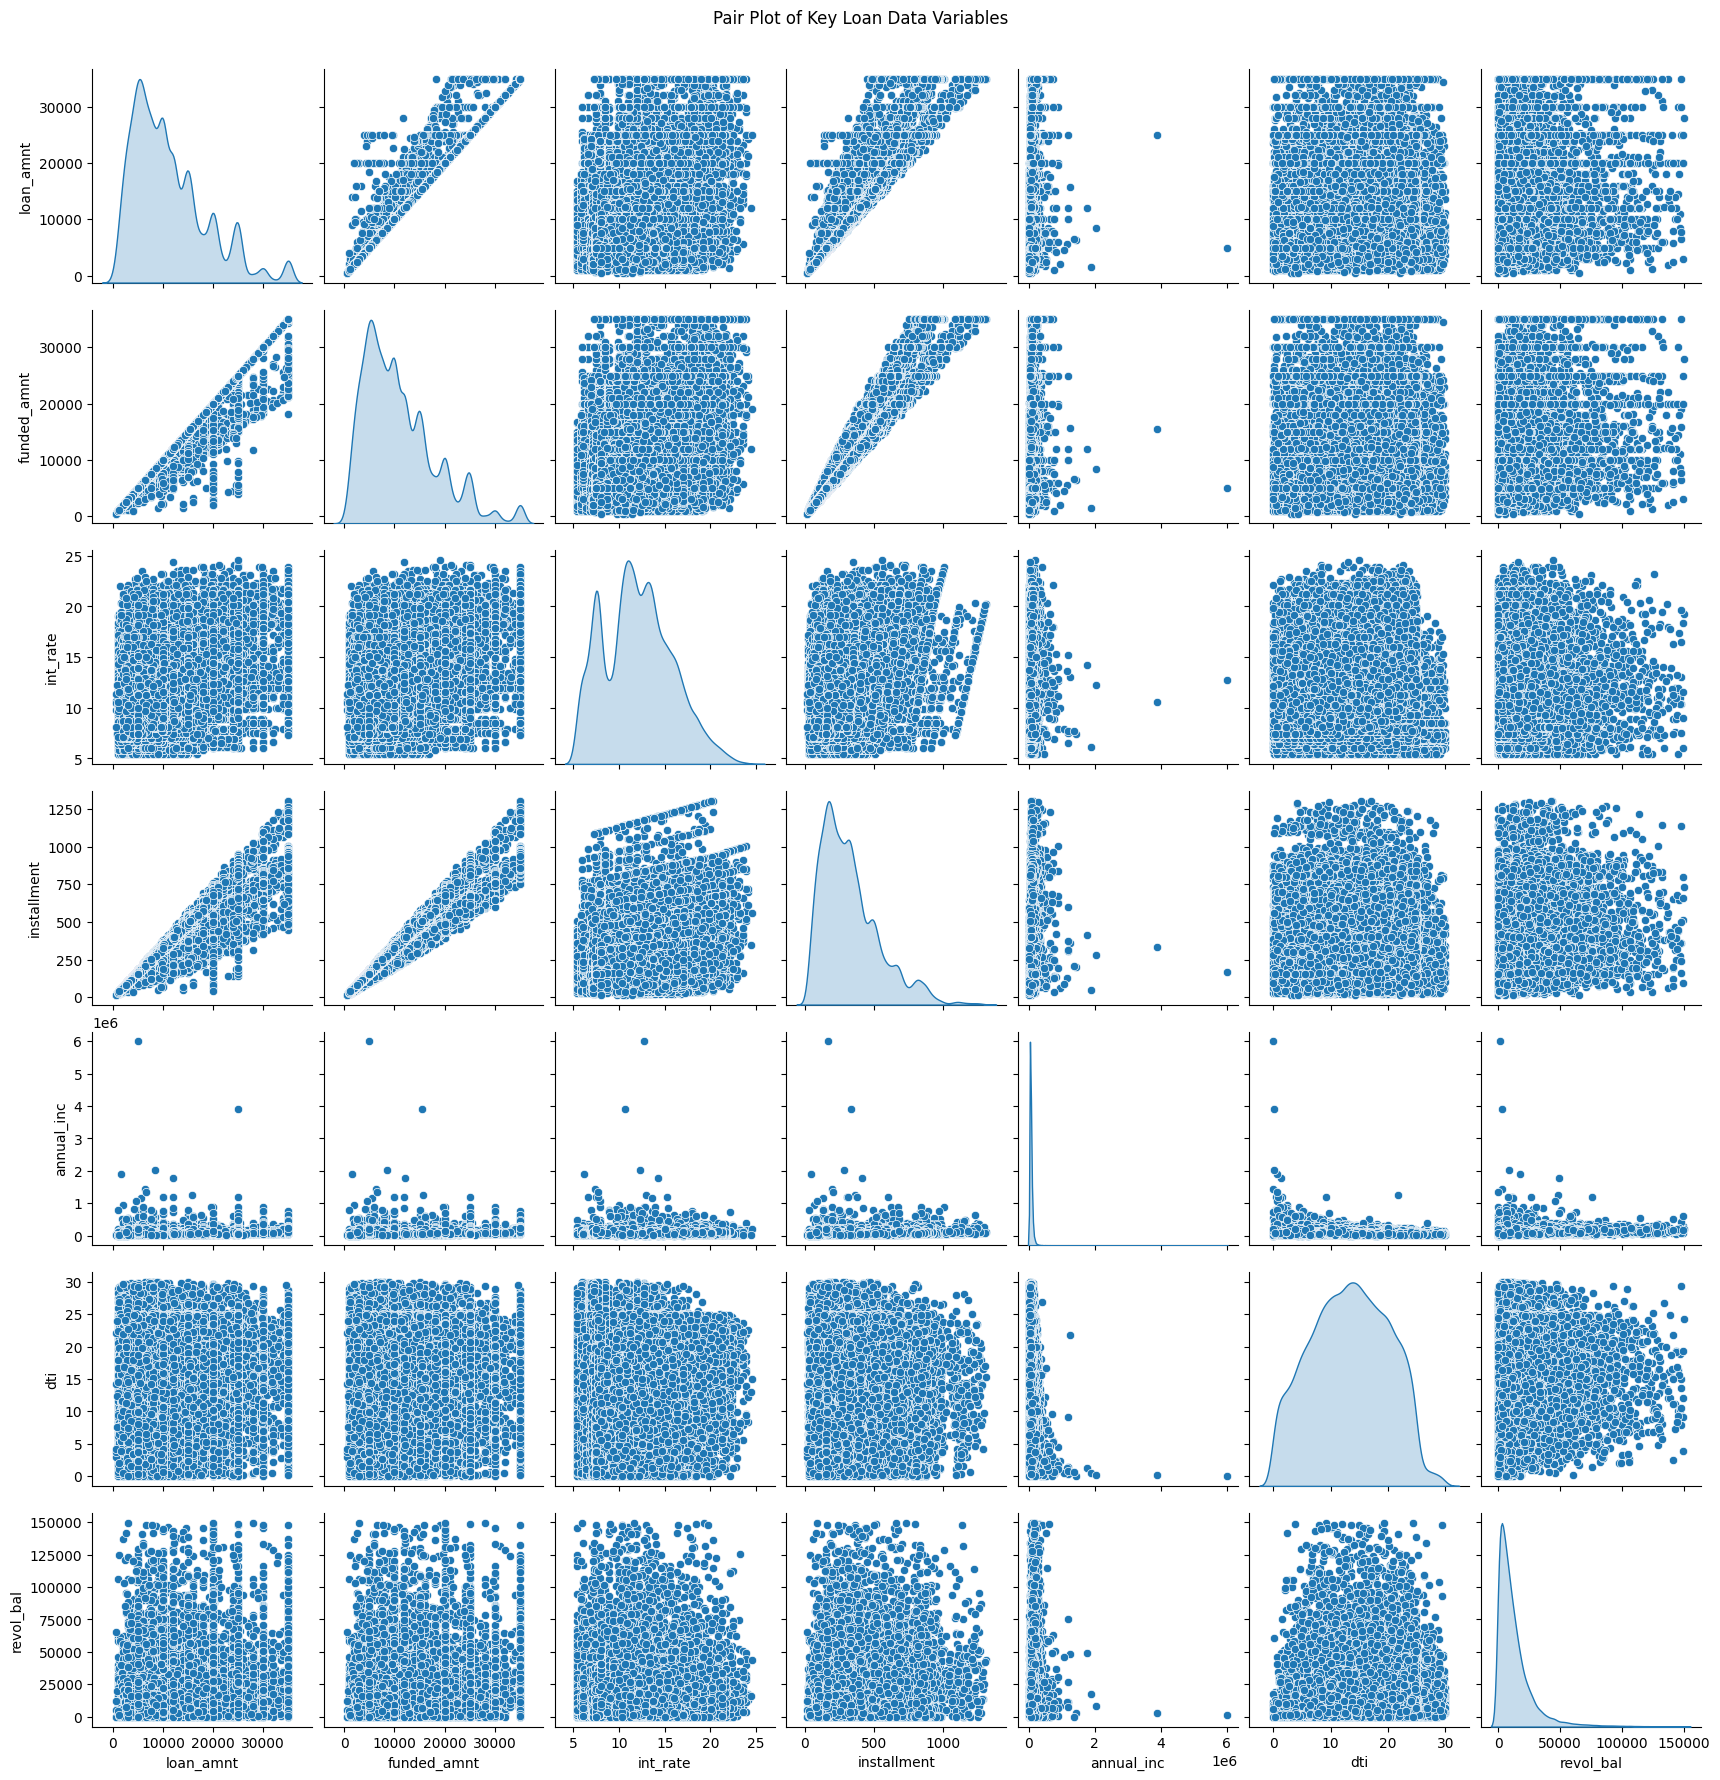

In [37]:
# Selecting key numerical variables for the pair plot
key_vars = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']

# Check if 'annual_inc' is in the dataset
if 'annual_inc' in df_cleaned.columns:
    data_subset = df_cleaned[key_vars]
else:
    data_subset = df_cleaned.drop(columns=['annual_inc'])

# Generating the pair plot
sns.pairplot(data_subset, diag_kind='kde')
plt.suptitle('Pair Plot of Key Loan Data Variables', y=1.02)
plt.show()

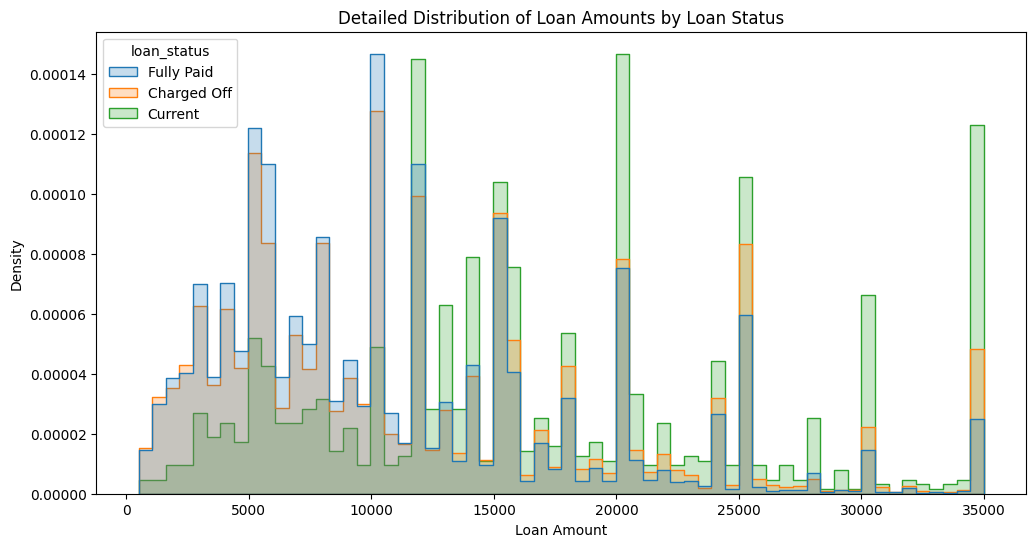

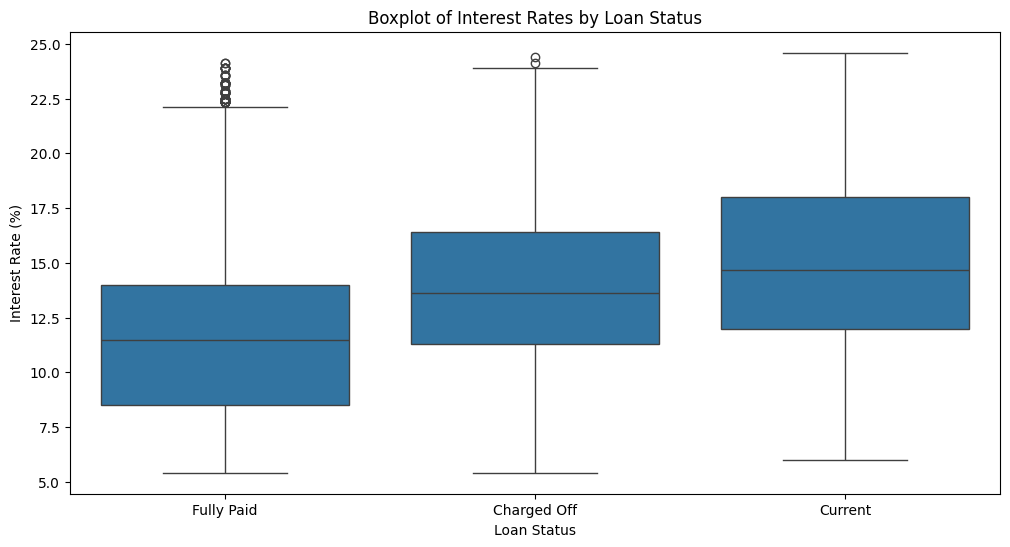

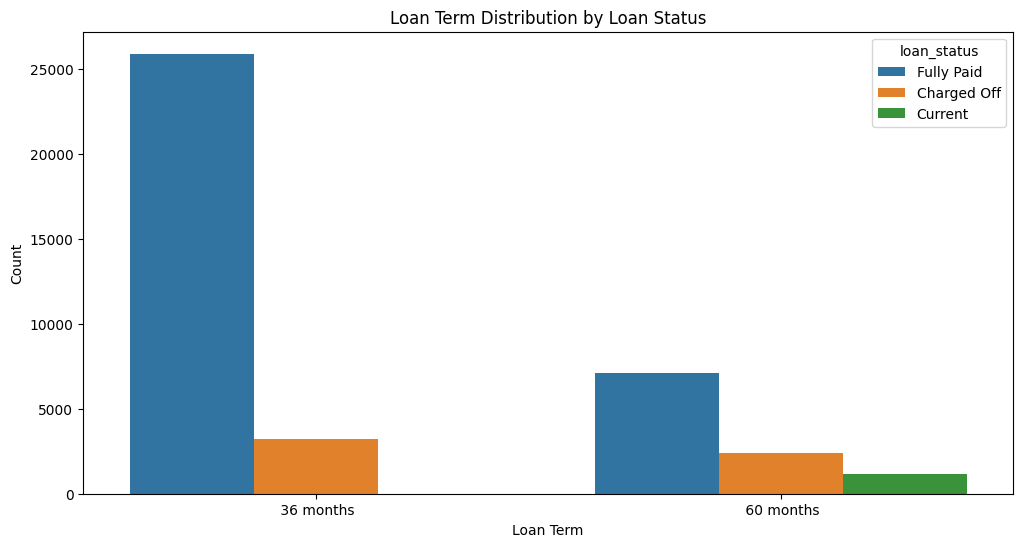

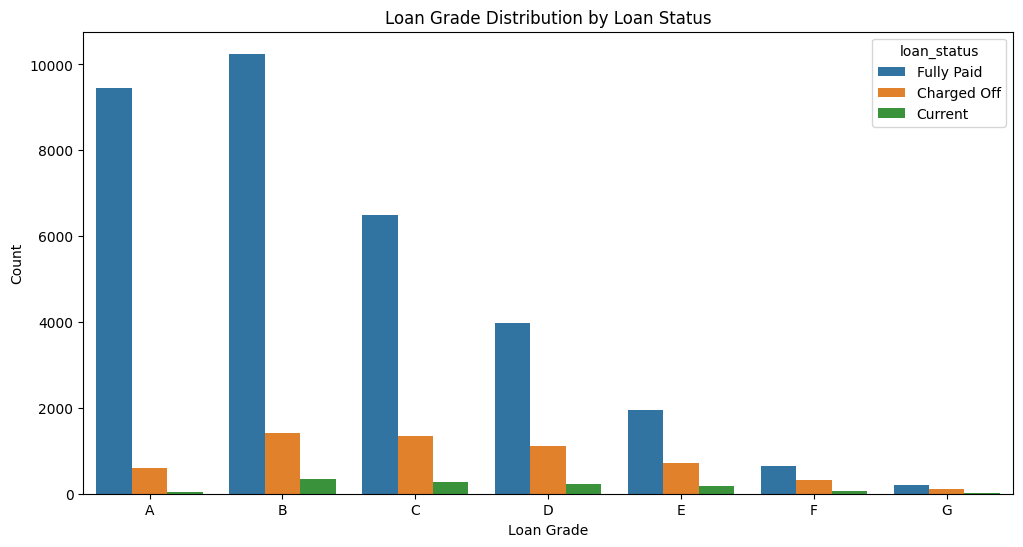

In [38]:
# Convert interest rate from string to float
#df_cleaned['int_rate'] = filtered_data['int_rate'].str.rstrip('%').astype('float')

# Loan Amount Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='loan_amnt', hue='loan_status', element='step', stat='density', common_norm=False)
plt.title('Detailed Distribution of Loan Amounts by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

# Interest Rate Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df_cleaned)
plt.title('Boxplot of Interest Rates by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

# Term Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='term', hue='loan_status', data=df_cleaned)
plt.title('Loan Term Distribution by Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

# Grade Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status', data=df_cleaned, order=sorted(df_cleaned['grade'].unique()))
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()


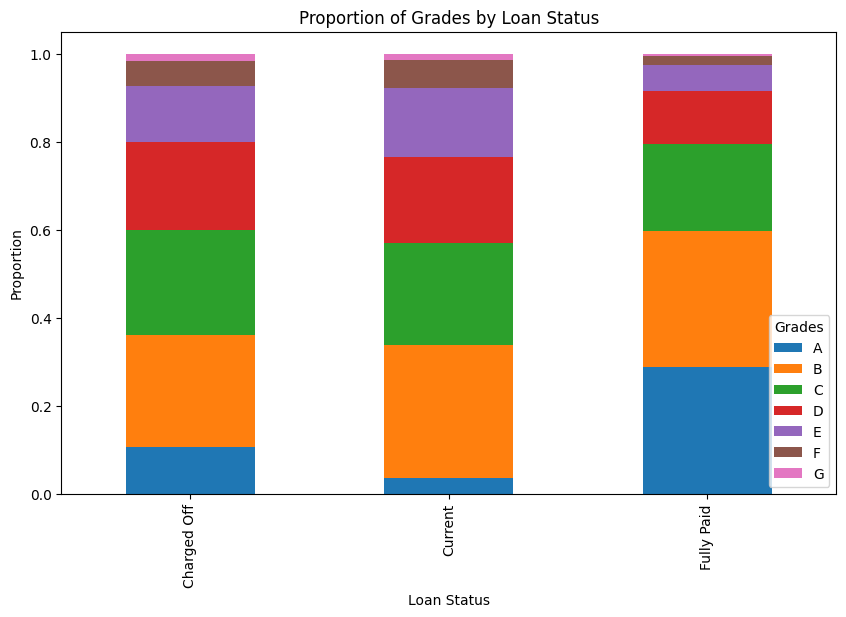

In [39]:
# Create a crosstab of loan_status and Grades
crosstab = pd.crosstab(df_cleaned['loan_status'], df_cleaned['grade'], normalize='index')

# Stacked Bar Plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Grades by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Grades')
plt.show()


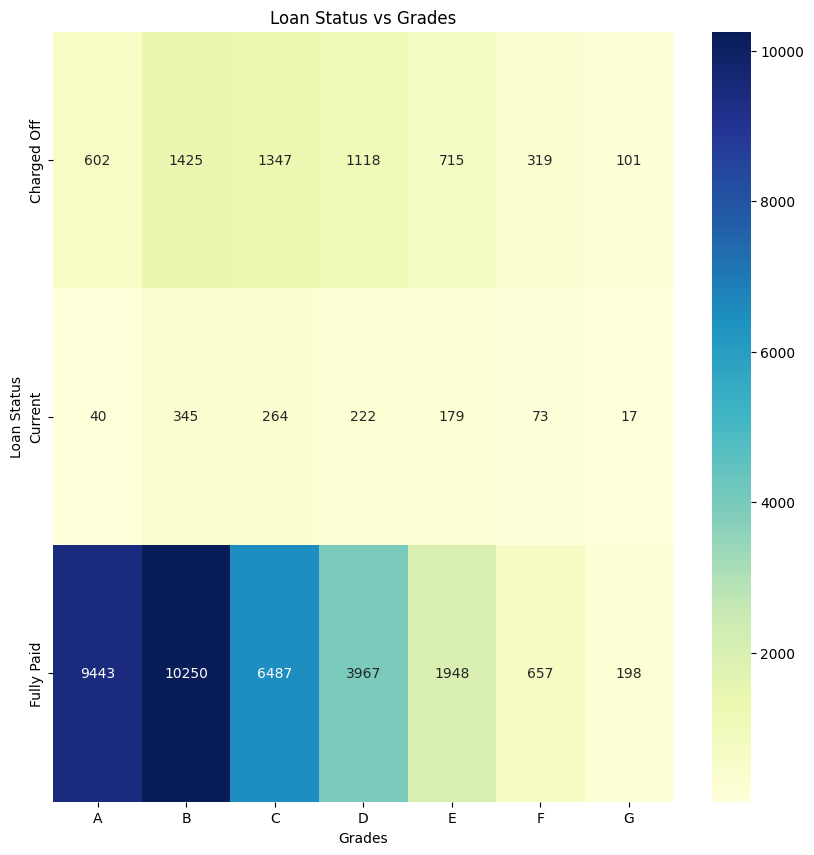

In [40]:
# Create a crosstab of loan_status and Grades
crosstab = pd.crosstab(df_cleaned['loan_status'], df_cleaned['grade'])

# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Loan Status vs Grades')
plt.xlabel('Grades')
plt.ylabel('Loan Status')
plt.show()


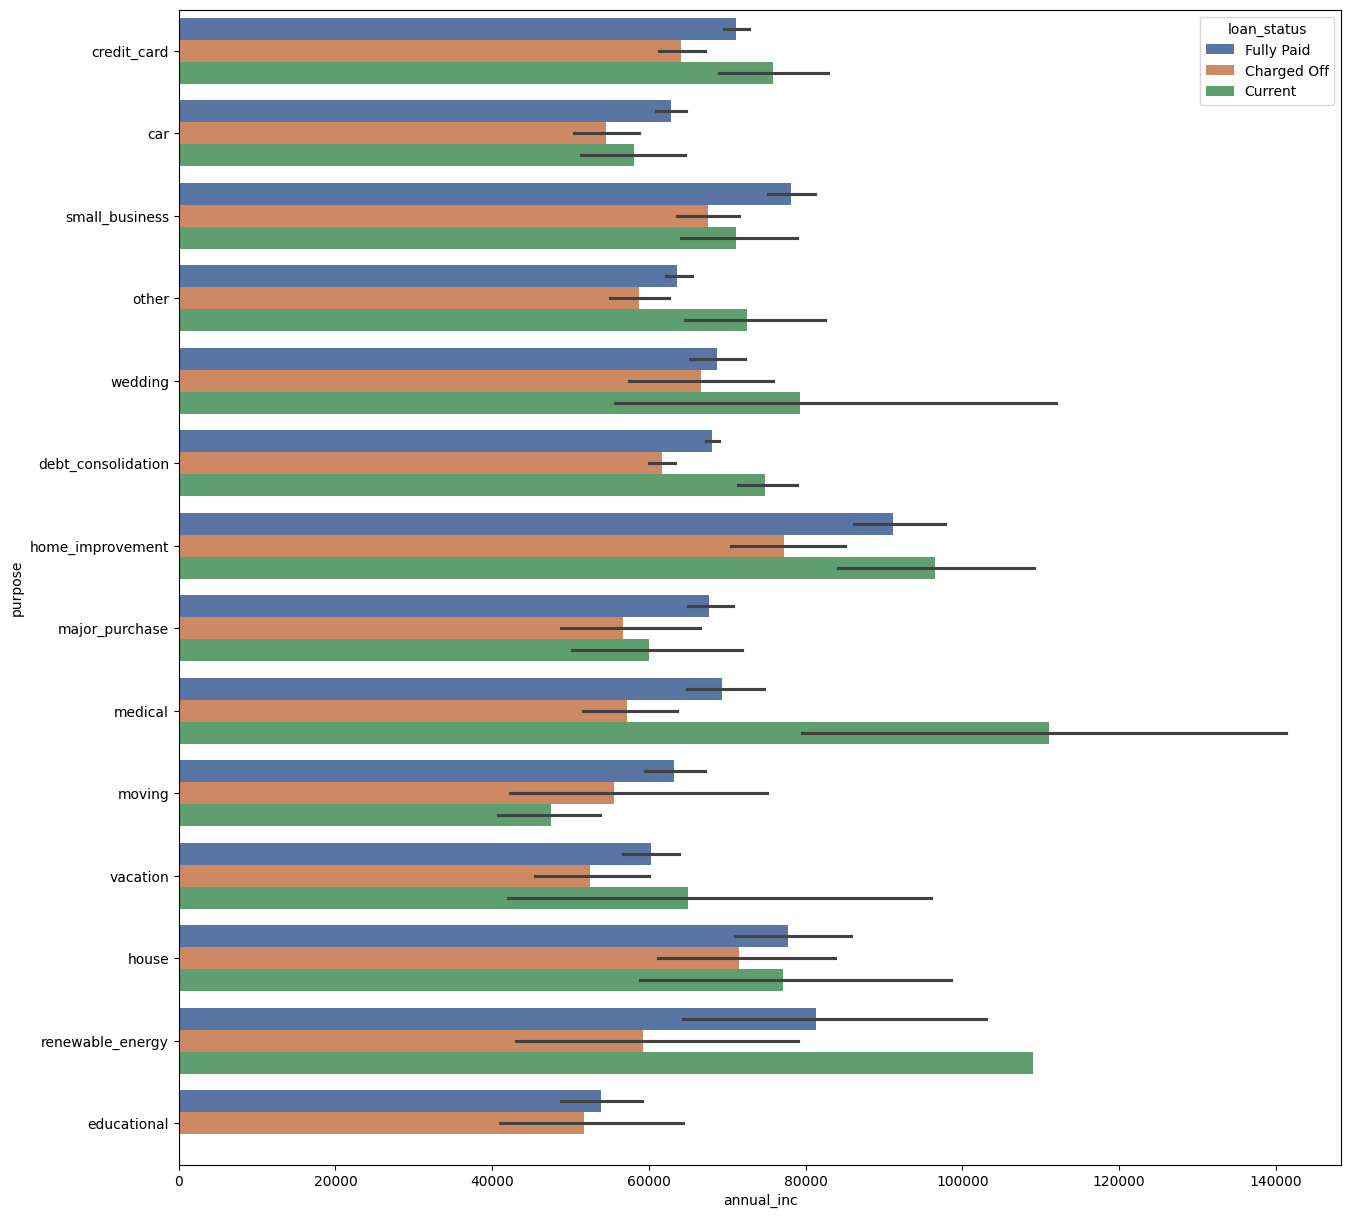

In [41]:
# Annual income vs Loan purpose
plt.figure(figsize=(15,15))
sns.barplot(data =df_cleaned,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()


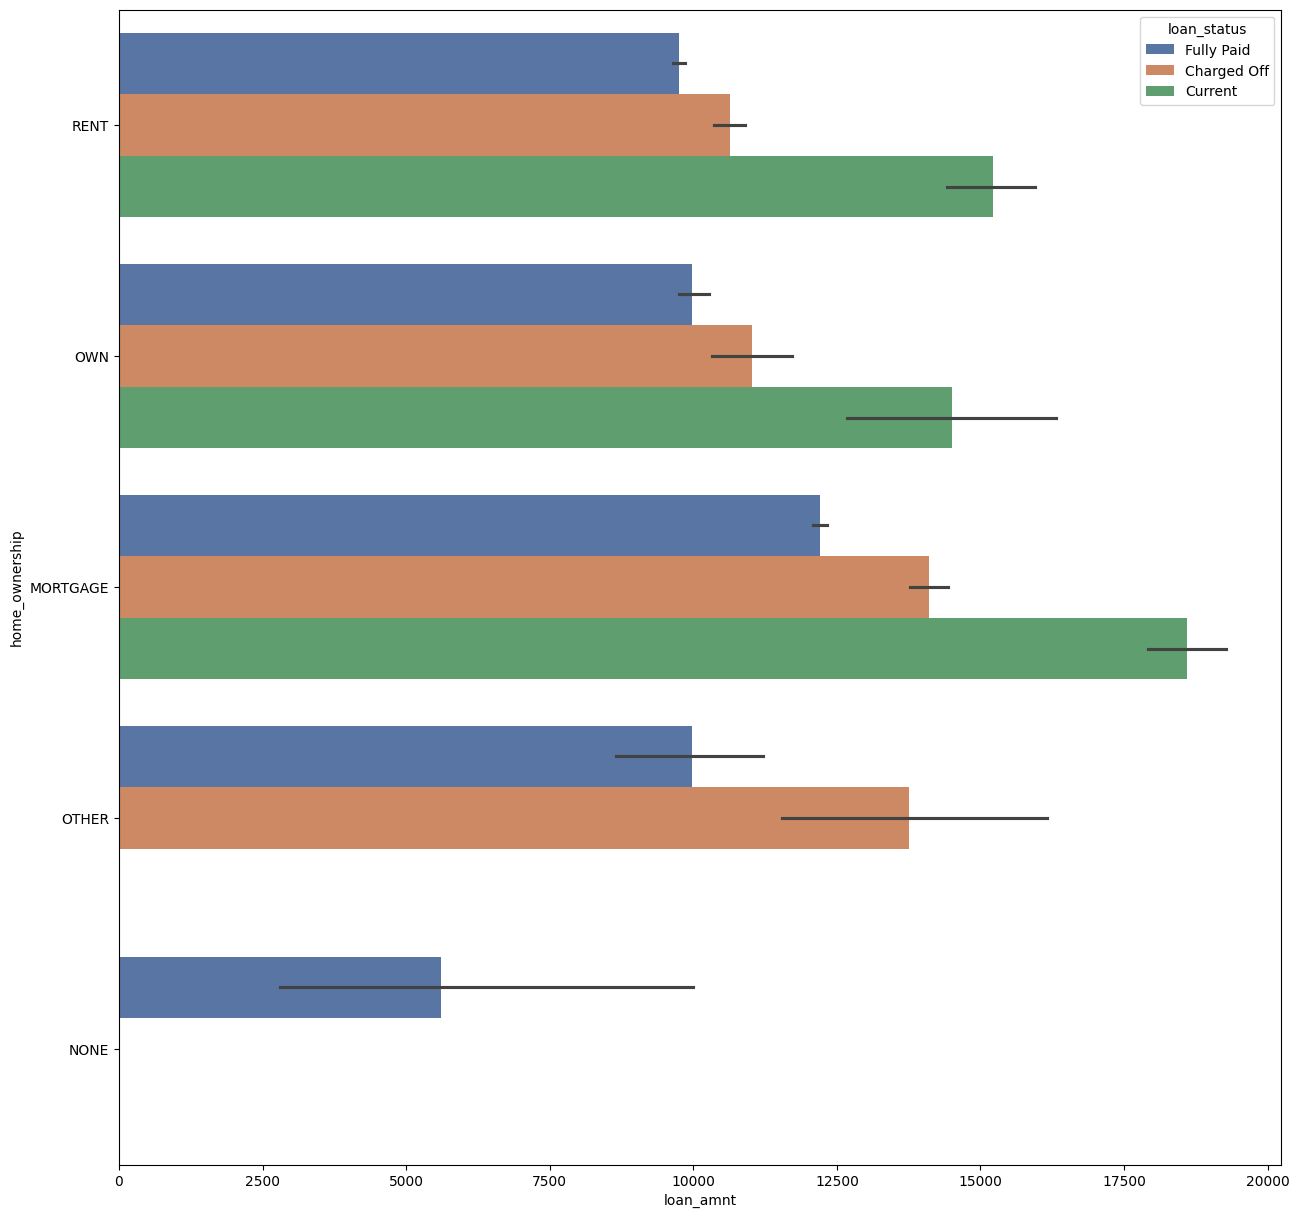

In [42]:
# loan amount vs Home owner type
plt.figure(figsize=(15,15))
sns.barplot(data =df_cleaned,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="deep")
plt.show()

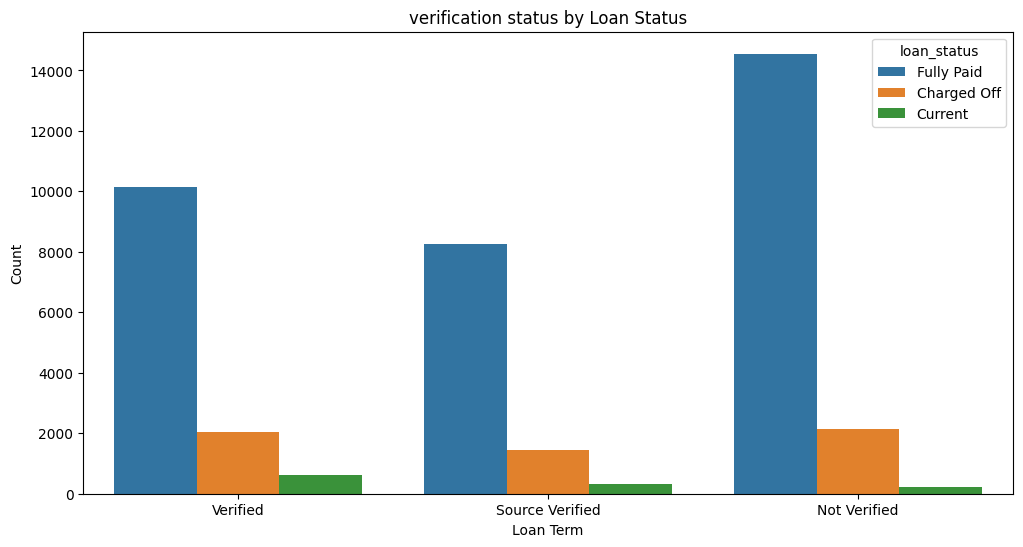

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='verification_status', hue='loan_status', data=df_cleaned)
plt.title('verification status by Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

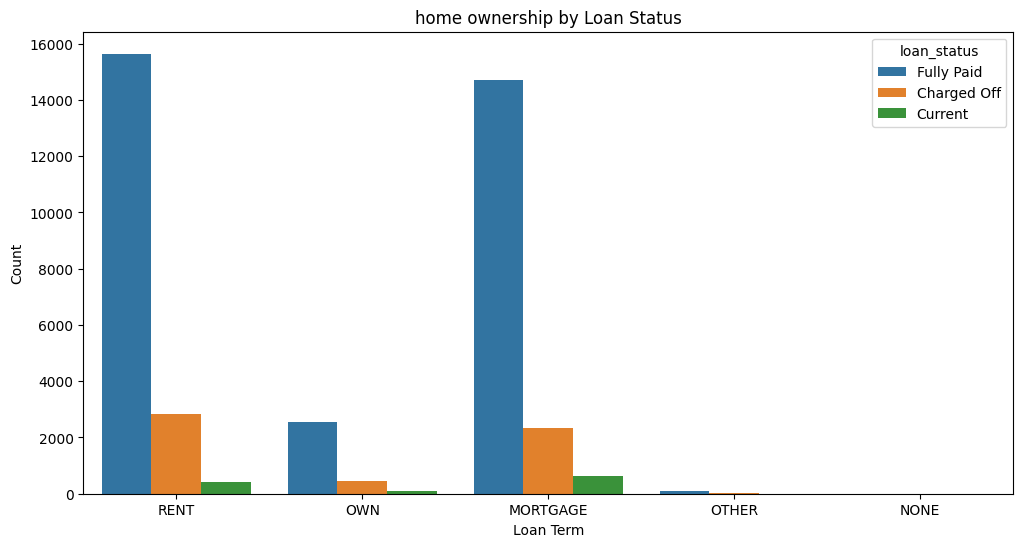

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df_cleaned)
plt.title('home ownership by Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()